### Student Information
Name:詹敬群

Student ID:112291524

GitHub ID:lalashark

Kaggle name:V111621

Kaggle private scoreboard snapshot:
(9th)
[Snapshot](https://hackmd.io/_uploads/B1IQYBTwa.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

## lets run trough the data frist

### see what does the tweet looks 

In [4]:
import json
import pandas as pd

In [6]:
file = open("data/tweets_DM.json", 'r', encoding='utf-8')
tweets_id = []
tweets_hashtags = []
tweets_text = []
for line in file.readlines():
    dic = json.loads(line)
    tweets_id.append(dic["_source"]["tweet"]["tweet_id"])
    tweets_hashtags.append(dic["_source"]["tweet"]["hashtags"])
    tweets_text.append(dic["_source"]["tweet"]["text"])

src = pd.DataFrame([], columns=[]) 

src = src.assign(id = tweets_id, hashtags = tweets_hashtags, text = tweets_text)

src.head(10)

,id,hashtags,text
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,[],"""Trust is not the same as faith. A friend is s..."
5,0x1d755c,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...
6,0x2c91a8,[],Still waiting on those supplies Liscus. <LH>
7,0x368e95,[],Love knows no gender. 😢😭 <LH>
8,0x249c0c,[LeagueCup],@DStvNgCare @DStvNg More highlights are being ...
9,0x218443,"[materialism, money, possessions]",When do you have enough ? When are you satisfi...


In [9]:
src.iloc[0]['text']

'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'

### the emotion part

In [11]:
colnames=['id', 'emotion'] 

label = pd.read_csv('data/emotion.csv', names=colnames, header=0)

label.head(10)

,id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
5,0x34cd80,joy
6,0x33f099,sadness
7,0x2ae7b7,sadness
8,0x2408d4,trust
9,0x2b193b,sadness


### merge it

In [12]:
train_data = pd.merge(src, label, on="id", how="left")

train_data.head(10)

,id,hashtags,text,emotion
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",sadness
2,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k...",NaN
3,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
4,0x2de201,[],"""Trust is not the same as faith. A friend is s...",NaN
5,0x1d755c,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
6,0x2c91a8,[],Still waiting on those supplies Liscus. <LH>,anticipation
7,0x368e95,[],Love knows no gender. 😢😭 <LH>,joy
8,0x249c0c,[LeagueCup],@DStvNgCare @DStvNg More highlights are being ...,sadness
9,0x218443,"[materialism, money, possessions]",When do you have enough ? When are you satisfi...,NaN


In [13]:
#we use the merge so the missing part might be NaN in 'emotion'
train_data = train_data.dropna(how='any')
train_data.head(10)

,id,hashtags,text,emotion
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",sadness
3,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
5,0x1d755c,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
6,0x2c91a8,[],Still waiting on those supplies Liscus. <LH>,anticipation
7,0x368e95,[],Love knows no gender. 😢😭 <LH>,joy
8,0x249c0c,[LeagueCup],@DStvNgCare @DStvNg More highlights are being ...,sadness
10,0x359db9,"[SSM, gender, diversity]",The #SSM debate; <LH> (a manufactured fantasy ...,anticipation
11,0x23b037,[],I love suffering 🙃🙃 I love when valium does no...,joy
12,0x1fde89,[Pissed],Can someone tell my why my feeds scroll back t...,anger


In [14]:
train_data.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

In [17]:
col=['id', 'emotion']
test = pd.read_csv('data/sampleSubmission.csv', names=col, header=0)
test.head(10)

,id,emotion
0,0x2c7743,surprise
1,0x2c1eed,surprise
2,0x2826ea,surprise
3,0x356d9a,surprise
4,0x20fd95,surprise
5,0x1dff4a,surprise
6,0x243512,surprise
7,0x27aa7d,surprise
8,0x1e983c,surprise
9,0x1e55ec,surprise


In [19]:
test_data = pd.merge(src, test, on="id", how="left")
test_data = test_data.dropna(axis=0, how='any') 

test_data.head(10)

,id,hashtags,text,emotion
2,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k...",surprise
4,0x2de201,[],"""Trust is not the same as faith. A friend is s...",surprise
9,0x218443,"[materialism, money, possessions]",When do you have enough ? When are you satisfi...,surprise
30,0x2939d5,"[GodsPlan, GodsWork]","God woke you up, now chase the day #GodsPlan #...",surprise
33,0x26289a,[],"In these tough times, who do YOU turn to as yo...",surprise
35,0x31c6e0,[],Turns out you can recognise people by their un...,surprise
37,0x32edee,[sheltered],"I like how Hayvens mommy, daddy, and the keybo...",surprise
46,0x3714ee,[notamused],I just love it when every single one of my son...,surprise
49,0x235628,[CelebrityBigBrother],@JulieChen when can we expect a season of #Cel...,surprise
56,0x283024,[],Tbh. Regret hurts more than stepping on a LEGO...,surprise


# 模型
這次的作業基本上**並未使用任何資料處理的技術**，堅定地相信**大力出奇蹟**，因此我使用了4張V100，把bert嚕過去
模型的技術細節基來說是參照這一篇https://ithelp.ithome.com.tw/m/articles/10275185

載入 Tokenizer 與 對句子進行 Encode

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)
     

設定 BERT Pretrained Model

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                            num_labels=len(label_dict),
                            output_attentions=False,
                            output_hidden_states=False)

建立dataloader

In [ ]:
batch_size = 32

dataloader_train = DataLoader(dataset_train, 
                sampler=RandomSampler(dataset_train), 
                batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                  sampler=SequentialSampler(dataset_val), 
                  batch_size=batch_size)
     

設定 Optimizer 與 Scheduler

In [ ]:
optimizer = AdamW(model.parameters(), lr=1e-5, eps=1e-8)

epochs = 10

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(dataloader_train)*epochs)
     

訓練

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)             
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

# 同場加映
**平行化** 大力出奇蹟之外，還要快簡單來說就是這樣

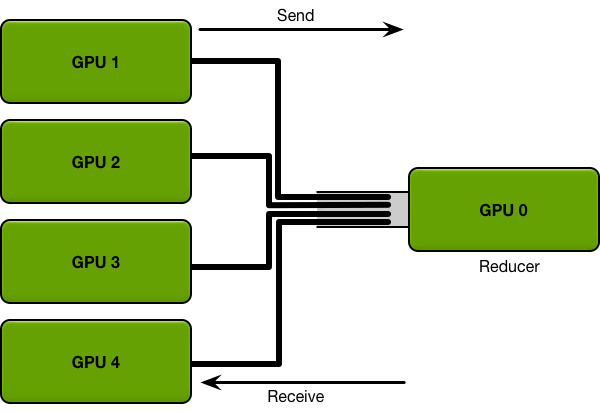

# Horovod
Horovod is a distributed deep learning training framework for TensorFlow, Keras, PyTorch, and Apache MXNet. The goal of Horovod is to make distributed deep learning fast and easy to use.

In [ ]:
import horovod.torch as hvd
hvd.init()

# Pin GPU to be used to process local rank (one GPU per process)
torch.cuda.set_device(hvd.local_rank())


## dataloader

In [ ]:
batch_size = 32

# dataloader_train = DataLoader(dataset_train, 
#                 sampler=RandomSampler(dataset_train), 
#                 batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                  sampler=SequentialSampler(dataset_val), 
                  batch_size=batch_size)

train_sampler = torch.utils.data.distributed.DistributedSampler(
    dataset_train, num_replicas=hvd.size(), rank=hvd.rank())
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, sampler=train_sampler)

## train

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    cnt = 0
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.cuda() for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        # print("model forward")
        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        # print("model backward")
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # print("model optimize")
        optimizer.step()
        # print("scheduler step")
        scheduler.step()
        
        if hvd.local_rank() == 0:
            print(f"Epoch {epoch}:  batch #{cnt}  loss: {loss.item()/len(batch):.3f}")
        cnt += 1
        # progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})

## result

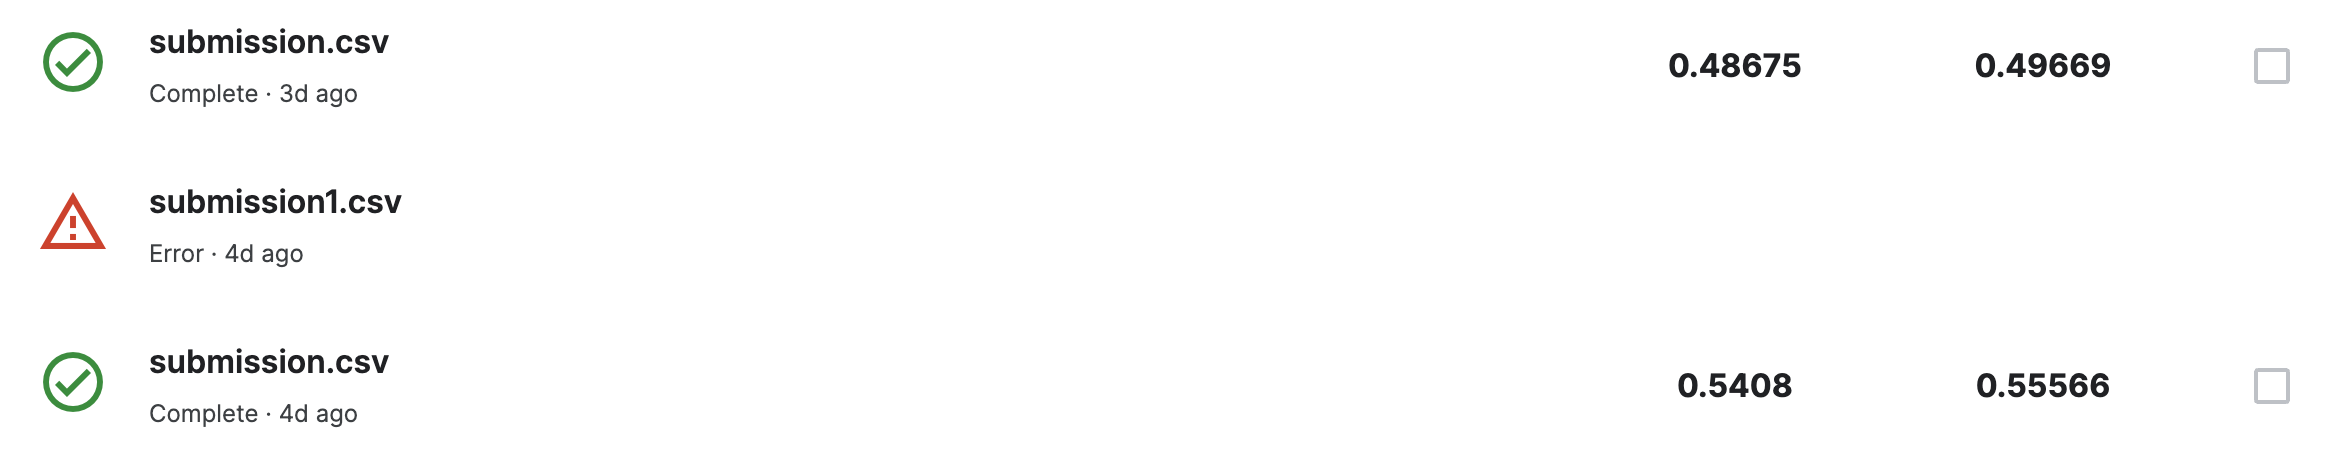

正確率沒有上去但速度至少快了10倍（因為等輸出的時間不知道多久，體感10倍）

完整的code可於DM2023.py看到